### Modeling Suicide Rates in Mexico
#### Final Project
Team: Victor González | Felipe Murillo | Marcela A. Vasquez

TEC Data Bootcamp | 2020

This Jupyter notebok is used to gather suicide data and support indicator data, 
etract and transform to be readily digestible by machinbe learning models.

---

### Import Dependecies

In [46]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extract suicide data

In [47]:
# Data Source:
# https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
wSuicides = pd.read_csv("../Data/master.csv")

# Extract Mexican data
mexSuicides = wSuicides.loc[wSuicides.country == "Mexico"].reset_index()
mexSuicides.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X


### Extract and merge unemployment data

In [48]:
# Harmonized Unemployment Rate:
# Harmonised unemployment rates define the unemployed as people of working age who are without work, 
# are available for work, and have taken specific steps to find work.
# This indicator is measured in numbers of unemployed people as a percentage of the labour force 
# and it is seasonally adjusted.
# --
# Source:  https://data.oecd.org/unemp/unemployment-rate.htm#indicator-chart
wUnemploy = pd.read_csv("../Data/Mexico Research Data/HUR.csv")
mexUnemploy = wUnemploy.loc[(wUnemploy.LOCATION == "MEX") & (wUnemploy.FREQUENCY == "A")]
mexUnemploy = mexUnemploy.drop(columns=["LOCATION","INDICATOR","MEASURE","FREQUENCY","Flag Codes"]).reset_index(drop=True)
mexUnemploy.TIME = mexUnemploy.TIME.astype(int)

In [49]:
# Initilize lists
mexUnemploy_f = []
mexUnemploy_m = []
gender_f = []
gender_m = []

# Pull year ranges for total, male, female
years = mexUnemploy.loc[(mexUnemploy.SUBJECT == "TOT")]["TIME"].unique()
minFemaleYr = mexUnemploy.loc[mexUnemploy.SUBJECT == "WOMEN"]["TIME"].min()
minMaleYr = mexUnemploy.loc[mexUnemploy.SUBJECT == "MEN"]["TIME"].min()

# Cycle thru every year. If FEMALE/MALE distinction exists, pull specific data. Else, copy collective rate.
for i in mexUnemploy.index:
    y = mexUnemploy.loc[i]["TIME"]
    if y < minFemaleYr:
        gender_f.append("female")
        mexUnemploy_f.append(mexUnemploy.loc[(mexUnemploy.SUBJECT == "TOT") & (mexUnemploy.TIME == y)]["Value"].tolist()[0])
    else:
        gender_f.append("female")
        mexUnemploy_f.append(mexUnemploy.loc[(mexUnemploy.SUBJECT == "WOMEN") & (mexUnemploy.TIME == y)]["Value"].tolist()[0])
    
    if y < minMaleYr:
        gender_m.append("male")
        mexUnemploy_m.append(mexUnemploy.loc[(mexUnemploy.SUBJECT == "TOT") & (mexUnemploy.TIME == y)]["Value"].tolist()[0])
    else:
        gender_m.append("male")
        mexUnemploy_m.append(mexUnemploy.loc[(mexUnemploy.SUBJECT == "MEN") & (mexUnemploy.TIME == y)]["Value"].tolist()[0])

In [50]:
# Create unemployment dataframe
f_df = pd.DataFrame(list(zip(gender_f, years, mexUnemploy_f)), 
               columns =['sex', 'year','unemployment'])
m_df = pd.DataFrame(list(zip(gender_m, years, mexUnemploy_m)), 
               columns =['sex', 'year','unemployment'])
mexUnemploy_df = pd.concat([f_df,m_df])

mexUnemploy_df.head(50)

,sex,year,unemployment
0,female,1987,3.883333
1,female,1988,3.541667
2,female,1989,2.925000
3,female,1990,2.741667
4,female,1991,2.691667
5,female,1992,2.783333
6,female,1993,3.425000
7,female,1994,3.641667
8,female,1995,6.266667
9,female,1996,5.525000


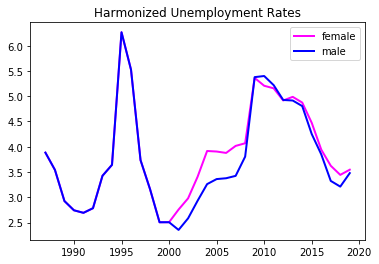

In [51]:
plt.plot( 'year', 'unemployment', data=mexUnemploy_df.loc[mexUnemploy_df.sex=="female"], label="female",color='magenta', linewidth=2)
plt.plot( 'year', 'unemployment', data=mexUnemploy_df.loc[mexUnemploy_df.sex=="male"],label="male", color='blue', linewidth=2)
plt.title("Harmonized Unemployment Rates")
plt.legend()

In [52]:
# Merge unemployment data to suicide dataframe
mexSuicides = mexSuicides.merge(mexUnemploy_df,how='left',on=["year","sex"])
mexSuicides.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,unemployment
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers,NaN
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent,NaN
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X,NaN


In [53]:
# Set unemployment rates for kids 5-14years to be 0.0 becuase they don't work (to be more realistic)
idx= mexSuicides.loc[(mexSuicides.age == "5-14 years") & (mexSuicides.year > 1986)].index
mexSuicides.at[idx,"unemployment"] = 0.0
mexSuicides.tail

<bound method NDFrame.tail of      index country  year     sex          age  suicides_no  population  \
0    16564  Mexico  1985    male    75+ years           44      432000   
1    16565  Mexico  1985    male  55-74 years          145     2330000   
2    16566  Mexico  1985    male  25-34 years          340     5679000   
3    16567  Mexico  1985    male  35-54 years          327     5836000   
4    16568  Mexico  1985    male  15-24 years          375     8420000   
..     ...     ...   ...     ...          ...          ...         ...   
367  16931  Mexico  2015  female  35-54 years          303    15940497   
368  16932  Mexico  2015  female  55-74 years           88     7021916   
369  16933  Mexico  2015    male   5-14 years          137    11790898   
370  16934  Mexico  2015  female   5-14 years           95    11261292   
371  16935  Mexico  2015  female    75+ years           11     1915217   

     suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0        

### Extract and merge divorce data

In [54]:
# http://www.oecd.org/els/family/database.htm
# Divorce per 1000 ppl
wDivorce = pd.read_excel("../Data/Mexico Research Data/SF_3_1_Marriage_divorce_rates.xlsx", header = 3)
mexDivorce = wDivorce.loc[wDivorce.Country == "Mexico"].set_index("Country")

In [55]:
# Drop empty columns
mexDivorce = mexDivorce.drop([col for col in mexDivorce.columns if mexDivorce[col].eq('..').any()], axis=1)
mexDivorce = mexDivorce.drop(columns= ["Note"])

In [56]:
# Create a dataframe with year and divorce rates
yrs = mexDivorce.columns.to_list()
divorceRates = mexDivorce.loc["Mexico"].to_list()
divorceRates_df = pd.DataFrame(list(zip(yrs, divorceRates)), 
               columns =['year', 'divorce'])
divorceRates_df

,year,divorce
0,1970,0.596800
1,1985,0.444000
2,1992,0.580000
3,1993,0.360000
4,1994,0.350000
5,1995,0.410900
6,1996,0.420000
7,1997,0.430000
8,1998,0.470000
9,1999,0.500000


Text(0.5, 1.0, 'Divorce Rates (Total)')

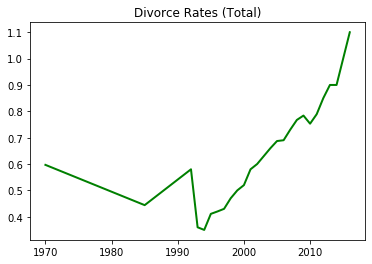

In [57]:
plt.plot( 'year', 'divorce', data=divorceRates_df,color='green', linewidth=2)
plt.title("Divorce Rates (Total)")

In [58]:
# Merge divorce info into suicide dataframe
mexSuicides = mexSuicides.merge(divorceRates_df,how='left',on=["year"])
mexSuicides.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers,NaN,0.444
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent,NaN,0.444
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X,NaN,0.444


In [59]:
# Set divorce rate for kids = 0.0
idx= mexSuicides.loc[(mexSuicides.age == "5-14 years") & (mexSuicides.year > 1970)].index
mexSuicides.at[idx,"divorce"] = 0.0

### Extract and merge obesity data

In [60]:
# https://apps.who.int/gho/data/node.imr.NCD_BMI_25A?lang=en
# % of population 18+, Overweight Adults (18+, BMI > 25)
wObesity = pd.read_csv("../Data/Mexico Research Data/NCD_BMI_25A.csv")
childObesity = pd.read_csv("../Data/Mexico Research Data/childhood_obesity.csv")
wObesity.columns
mexObesity = wObesity.loc[wObesity['Unnamed: 0'] == "Mexico"]
mexObesity = mexObesity.drop(columns=["Unnamed: 0"])

In [61]:
# Transpose data, rename and convert to correct dtype
mexObesity = mexObesity.T.reset_index()
mexObesity = mexObesity.rename(columns={113:"obesity","index":"year"})
mexObesity["year"] = pd.to_numeric(mexObesity["year"])

In [62]:
# Extract obesity data and convert to dataframe
obesity_list = []
years = []
genders = []
for i in mexObesity.index:
    obesity_list.append(mexObesity.loc[i]["obesity"].split()[0])
    years.append(mexObesity.loc[i]["year"].round(decimals=0).astype(int))
    dt = mexObesity.loc[i]["year"] - mexObesity.loc[i]["year"].round(decimals=0)
    if  dt > 0.19:
        gender = "female"
    elif dt > 0.09:
        gender = "male"
    else:
        gender = "total"
    genders.append(gender)
mexObesity["obesity_f"] = obesity_list
mexObesity["year_f"] = years
mexObesity["sex"] = genders

In [63]:
# Convert data, remove unneeded columns
mexObesity["obesity_f"] = pd.to_numeric(mexObesity["obesity_f"])
mexObesity = mexObesity.drop(columns=["year","obesity"])
mexObesity = mexObesity.rename(columns={"obesity_f":"obesity","year_f":"year"})

In [64]:
mexObesity.head(20)

,obesity,year,sex
0,64.9,2016,total
1,63.6,2016,male
2,66.0,2016,female
3,64.4,2015,total
4,63.0,2015,male
5,65.5,2015,female
6,63.9,2014,total
7,62.4,2014,male
8,65.1,2014,female
9,63.3,2013,total


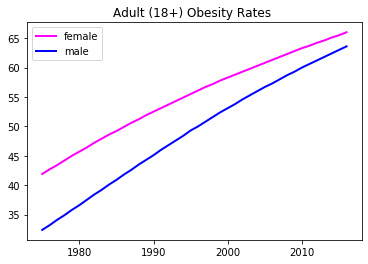

In [65]:
plt.plot( 'year', 'obesity', data=mexObesity.loc[mexObesity.sex=="female"], label="female",color='magenta', linewidth=2)
plt.plot( 'year', 'obesity', data=mexObesity.loc[mexObesity.sex=="male"],label="male", color='blue', linewidth=2)
plt.title("Adult (18+) Obesity Rates ")
plt.legend()

In [66]:
# Merge obesity data to suicide dataframe
mexSuicides = mexSuicides.merge(mexObesity,how='left',on=["year","sex"])

In [67]:
# Set obesity rates for kids = 0.0 (we'll use childhood obseity dataframe to populate)
idx= mexSuicides.loc[(mexSuicides.age == "5-14 years") & (mexSuicides.year > 1974)].index
mexSuicides.at[idx,"obesity"] = np.nan

In [68]:
# Now pull childhood obesity rates
childObesity = childObesity.drop(columns=["Location","Indicator"])
childObesity

,Period,Dim1,Dim2,First Tooltip
0,2016,Both sexes,5-19 years,14.8 [10.6-19.3]
1,2016,Male,5-19 years,16.7 [10.4-23.6]
2,2016,Female,5-19 years,12.8 [7.5-19.1]
3,2015,Both sexes,5-19 years,14.4 [10.7-18.5]
4,2015,Male,5-19 years,16.3 [10.6-22.6]
...,...,...,...,...
121,1976,Male,5-19 years,2.9 [0.2-10.4]
122,1976,Female,5-19 years,2.1 [0.2-6.5]
123,1975,Both sexes,5-19 years,2.4 [0.5-6.7]
124,1975,Male,5-19 years,2.8 [0.2-10.4]


In [69]:
# Replace values to make merge work
childObesity = childObesity.replace(["Male","Female","Both sexes","5-19  years"],["male","female","both","5-14 years"])
childObesity 

,Period,Dim1,Dim2,First Tooltip
0,2016,both,5-14 years,14.8 [10.6-19.3]
1,2016,male,5-14 years,16.7 [10.4-23.6]
2,2016,female,5-14 years,12.8 [7.5-19.1]
3,2015,both,5-14 years,14.4 [10.7-18.5]
4,2015,male,5-14 years,16.3 [10.6-22.6]
...,...,...,...,...
121,1976,male,5-14 years,2.9 [0.2-10.4]
122,1976,female,5-14 years,2.1 [0.2-6.5]
123,1975,both,5-14 years,2.4 [0.5-6.7]
124,1975,male,5-14 years,2.8 [0.2-10.4]


In [70]:
# Pull obesity rate from First Tooltip column
chObesity = []
for i in childObesity.index:
    pt = pd.to_numeric(childObesity.loc[i]["First Tooltip"].split()[0])
    chObesity.append(pt)

In [71]:
# Finalize child obesity dataframe
childObesity["obesity"] = chObesity
childObesity = childObesity.rename(columns={"Period":"year","Dim1":"sex", "Dim2":"age"})
childObesity = childObesity.drop(columns=["First Tooltip"])

In [72]:
childObesity.head(20)

,year,sex,age,obesity
0,2016,both,5-14 years,14.8
1,2016,male,5-14 years,16.7
2,2016,female,5-14 years,12.8
3,2015,both,5-14 years,14.4
4,2015,male,5-14 years,16.3
5,2015,female,5-14 years,12.5
6,2014,both,5-14 years,14.1
7,2014,male,5-14 years,15.9
8,2014,female,5-14 years,12.2
9,2013,both,5-14 years,13.7


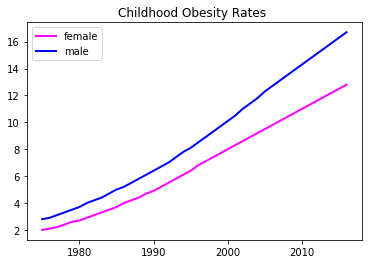

In [73]:
plt.plot( 'year', 'obesity', data=childObesity.loc[childObesity.sex=="female"], label="female",color='magenta', linewidth=2)
plt.plot( 'year', 'obesity', data=childObesity.loc[childObesity.sex=="male"],label="male", color='blue', linewidth=2)
plt.title("Childhood Obesity Rates ")
plt.legend()

In [74]:
# Merge obesity data to suicide dataframe
mexSuicides = mexSuicides.merge(childObesity,how='left',on=["year","sex","age"])
mexSuicides.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity_x,obesity_y
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9,NaN
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9,NaN
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers,NaN,0.444,40.9,NaN
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent,NaN,0.444,40.9,NaN
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X,NaN,0.444,40.9,NaN


In [75]:
# Ok, now we have two obseity columns! Needs merge them
mexSuicides["obesity"] = mexSuicides.ffill(axis=1).iloc[:, -1]

# Delete adult and childhood obesity columns
mexSuicides = mexSuicides.drop(columns=["obesity_x","obesity_y"])
mexSuicides

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers,NaN,0.444,40.9
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent,NaN,0.444,40.9
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X,NaN,0.444,40.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,16931,Mexico,2015,female,35-54 years,303,15940497,1.90,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X,4.472813,1.000,65.5
368,16932,Mexico,2015,female,55-74 years,88,7021916,1.25,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers,4.472813,1.000,65.5
369,16933,Mexico,2015,male,5-14 years,137,11790898,1.16,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z,0.000000,0.000,16.3
370,16934,Mexico,2015,female,5-14 years,95,11261292,0.84,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z,0.000000,0.000,12.5


### Extract alcohol data

In [76]:
# https://www.who.int/data/gho/data/indicators/indicator-details/GHO/alcohol-recorded-per-capita-(15-)-consumption-(in-litres-of-pure-alcohol)
# liters of alcohol consumed per capita
mexAlcohol = pd.read_csv("../Data/Mexico Research Data/alcohol_data.csv")

In [77]:
# Remove unneeded data
idx = mexAlcohol.loc[mexAlcohol.Dim1 != "All types"].index
mexAlcohol = mexAlcohol.drop(index=idx)
mexAlcohol = mexAlcohol.drop(columns=["Location","DataSource","Indicator", "Dim1"])

In [78]:
# Rename columns
mexAlcohol = mexAlcohol.rename(columns={"Period":"year","First Tooltip":"alcohol_o"})

In [79]:
# Extract desired values
alcohol = []
for i in mexAlcohol.index:
    pt = pd.to_numeric(mexAlcohol.loc[i]["alcohol_o"].split()[0])
    alcohol.append(pt)
mexAlcohol["alcohol"] = alcohol
mexAlcohol = mexAlcohol.drop(columns=["alcohol_o"])

In [80]:
mexAlcohol.head(20)

,year,alcohol
0,2018,4.25
5,2017,4.25
10,2016,4.25
15,2015,4.24
20,2014,3.94
25,2013,3.81
30,2012,3.86
35,2011,4.00
40,2010,4.05
45,2009,4.37


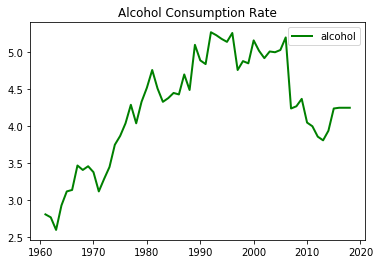

In [81]:
plt.plot( 'year', 'alcohol', data=mexAlcohol,color='green', linewidth=2)
plt.title("Alcohol Consumption Rate")
plt.legend()

In [82]:
# Merge alcohol data to suicide dataframe
# We're keeping alcohol rates for kids as well, to catch the environment they may be in 
mexSuicides = mexSuicides.merge(mexAlcohol,how='left',on=["year"])
mexSuicides.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity,alcohol
0,16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9,4.45
1,16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation,NaN,0.444,40.9,4.45
2,16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers,NaN,0.444,40.9,4.45
3,16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent,NaN,0.444,40.9,4.45
4,16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X,NaN,0.444,40.9,4.45


### Extract and Transform migration rate data

In [83]:
# https://population.un.org/wpp/Download/Standard/Migration/
# Net migration rate by region, subregion and country, 1950-2100 (per 1,000 population)
wMigration = pd.read_excel("../Data/Mexico Research Data/WPP2019_MIGR_F01_NET_MIGRATION_RATE.xlsx", sheet_name= "ESTIMATES",header = 16)
mexMigration = wMigration.loc[wMigration["Country code"] == 484].reset_index() #Code for Mexico

# Remove columns that do not contain relevant data
mexMigration = mexMigration.drop(columns=["index","Index","Variant","Region, subregion, country or area *","Notes","Country code","Type","Parent code"])
mexMigration = mexMigration.T.reset_index()
mexMigration = mexMigration.rename(columns={"index":"yr_range",0:"migration"})
mexMigration 

,yr_range,migration
0,1950-1955,-1.538
1,1955-1960,-1.64
2,1960-1965,-1.998
3,1965-1970,-2.577
4,1970-1975,-3.314
5,1975-1980,-3.938
6,1980-1985,-3.543
7,1985-1990,-4.591
8,1990-1995,-4.598
9,1995-2000,-4.82


In [84]:
# Set migration rate data in range to individual years
years = []
migra = []
for i in mexMigration.index:
    yrRange = pd.to_numeric(mexMigration.loc[i]["yr_range"].split("-"))
    for j in np.arange(yrRange[0],yrRange[1]):
        years.append(j)
        migra.append(pd.to_numeric(mexMigration.loc[i]["migration"]))

In [85]:
# Create migration dataframe
migration_df = pd.DataFrame(list(zip(years, migra)), 
               columns =['year', 'migration'])
migration_df.tail(50)

,year,migration
20,1970,-3.314
21,1971,-3.314
22,1972,-3.314
23,1973,-3.314
24,1974,-3.314
25,1975,-3.938
26,1976,-3.938
27,1977,-3.938
28,1978,-3.938
29,1979,-3.938


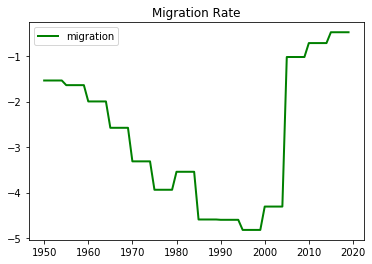

In [86]:
plt.plot( 'year', 'migration', data=migration_df,color='green', linewidth=2)
plt.title("Migration Rate")
plt.legend()

In [88]:
# Merge migration data to suicide dataframe
mexModel_df = mexSuicides.merge(migration_df,how='left',on=["year"])

In [89]:
# Drop columns that are not required
mexModel_df = mexModel_df.drop(columns=["index","country","country-year","HDI for year"])


In [90]:
mexModel_df = mexModel_df.dropna(how="any").reset_index(drop=True)

In [91]:
mexModel_df.to_csv("../Data/Mexico Research Data/mexModel.csv")

In [92]:
mexModel_df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity,alcohol,migration
0,1987,male,5-14 years,36,10423000,0.35,"140,263,387,027",2064,Generation X,0.000000,0.0,5.5,4.70,-4.591
1,1987,female,5-14 years,16,10086000,0.16,"140,263,387,027",2064,Generation X,0.000000,0.0,4.2,4.70,-4.591
2,1988,male,5-14 years,46,10438000,0.44,"183,144,164,357",2630,Generation X,0.000000,0.0,5.8,4.49,-4.591
3,1988,female,5-14 years,15,10101000,0.15,"183,144,164,357",2630,Generation X,0.000000,0.0,4.4,4.49,-4.591
4,1989,male,5-14 years,40,10466000,0.38,"222,977,046,516",3125,Generation X,0.000000,0.0,6.1,5.10,-4.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2015,female,35-54 years,303,15940497,1.90,"1,169,622,672,463",10228,Generation X,4.472813,1.0,65.5,4.24,-0.478
294,2015,female,55-74 years,88,7021916,1.25,"1,169,622,672,463",10228,Boomers,4.472813,1.0,65.5,4.24,-0.478
295,2015,male,5-14 years,137,11790898,1.16,"1,169,622,672,463",10228,Generation Z,0.000000,0.0,16.3,4.24,-0.478
296,2015,female,5-14 years,95,11261292,0.84,"1,169,622,672,463",10228,Generation Z,0.000000,0.0,12.5,4.24,-0.478
